In [1]:
# Phase1 - Data preparation

In [2]:
import pandas as pd
from datasets import load_dataset

In [3]:
# Loading dataset from Hugging Face and analysing it's structure
dataset = load_dataset("Abirate/english_quotes")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['quote', 'author', 'tags'],
        num_rows: 2508
    })
})


In [4]:
#converting to pandas dataframe for more convinience
df = dataset['train'].to_pandas()
print("dataset converted to pandas dataframe")

dataset converted to pandas dataframe


In [5]:
df.head()

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"


In [6]:
#initial dataframe inspection

In [7]:
print("--- DataFrame Shape ---")
print(df.shape)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

--- DataFrame Shape ---
(2508, 3)

The dataset has 2508 rows and 3 columns.


In [8]:
print("\n---Dataframe information---")
df.info()


---Dataframe information---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   2508 non-null   object
 1   author  2508 non-null   object
 2   tags    2508 non-null   object
dtypes: object(3)
memory usage: 58.9+ KB


In [9]:
print("--- Column Names ---")
print(df.columns)

--- Column Names ---
Index(['quote', 'author', 'tags'], dtype='object')


In [10]:
print("--- Missing values Count Per Column ---")
print(df.isnull().sum())

--- Missing values Count Per Column ---
quote     0
author    0
tags      0
dtype: int64


In [11]:
# checking for quote duplicates in the quote column
quote_duplicates_count = df.duplicated(subset=['quote']).sum()
print(f"Number of rows with duplicate quotes: {quote_duplicates_count}")

Number of rows with duplicate quotes: 1


In [12]:
#checking for if author also same or not 
quote_author_duplicates_count = df.duplicated(subset=['quote', 'author']).sum()
print(f"Number of rows with duplicate (quote, author) pairs: {quote_author_duplicates_count}")

Number of rows with duplicate (quote, author) pairs: 0


In [13]:
#inspecting the duplicate column
if quote_duplicates_count > 0:
    print("\nDisplaying the duplicated quote:")
    display(df[df.duplicated(subset=['quote'], keep=False)].sort_values('quote'))



Displaying the duplicated quote:


,quote,author,tags
947,“A woman's heart should be so hidden in God th...,Max Lucado,"[inspirational, love]"
1922,“A woman's heart should be so hidden in God th...,Maya Angelou,[inspirational]


In [14]:
# since, found two identical quotes with different authors, this is considered to be a data conflict or an integrity issue.
# for the scope of this assignment I am Keeping the first occurrence of the duplicate and drops the rest (clearly documented in README)

In [15]:
# removing duplicates and data cleaning

df_cleaned = df.drop_duplicates(subset=['quote'], keep ='first').reset_index(drop=True)
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing duplicate quotes: {len(df_cleaned)}")

Original number of rows: 2508
Number of rows after removing duplicate quotes: 2507


In [16]:
#analyzing author distribution

In [17]:
print("Analyzing Author Distribution")
author_counts = df_cleaned['author'].value_counts()

print("\nTop 10 most frequent authors:")
print(author_counts.head(10))

Analyzing Author Distribution

Top 10 most frequent authors:
author
Cassandra Clare,    99
J.K. Rowling,       74
John Green,         53
Roy T. Bennett,     46
Mark Twain          42
Albert Einstein     35
Suzanne Collins,    34
Nicholas Sparks,    32
Oscar Wilde,        30
Oscar Wilde         30
Name: count, dtype: int64


In [18]:
# since "Oscar Wilde" and "Oscar Wilde," are treated as two different authors because of the 'comma', the data needed to be normalized
# normalizing the author column by removing leading/trailing whitespace and unwanted punctuation.

In [19]:
print("Unique author names before cleaning (sample):")
print(df_cleaned['author'].unique()[:20])

Unique author names before cleaning (sample):
['Oscar Wilde' 'Marilyn Monroe' 'Albert Einstein' 'Frank Zappa'
 'Marcus Tullius Cicero' 'Bernard M. Baruch' 'William W. Purkey'
 'Dr. Seuss' 'Mae West' 'Mahatma Gandhi' 'Robert Frost' 'J.K. Rowling,'
 'Albert Camus' 'Mark Twain' 'C.S. Lewis,' 'Elbert Hubbard'
 'Martin Luther King Jr.,' 'Friedrich Nietzsche,' 'Stephen Chbosky,'
 'Oscar Wilde,']


In [20]:
df_cleaned['author'] = df_cleaned['author'].str.rstrip('.,').str.strip()

print("\n--- Author names have been cleaned and normalized ---\n")
print("Unique author names after cleaning (sample):")
print(df_cleaned['author'].unique()[:20])


--- Author names have been cleaned and normalized ---

Unique author names after cleaning (sample):
['Oscar Wilde' 'Marilyn Monroe' 'Albert Einstein' 'Frank Zappa'
 'Marcus Tullius Cicero' 'Bernard M. Baruch' 'William W. Purkey'
 'Dr. Seuss' 'Mae West' 'Mahatma Gandhi' 'Robert Frost' 'J.K. Rowling'
 'Albert Camus' 'Mark Twain' 'C.S. Lewis' 'Elbert Hubbard'
 'Martin Luther King Jr' 'Friedrich Nietzsche' 'Stephen Chbosky'
 'Ralph Waldo Emerson']


Re-analyzing Author Distribution after cleaning...

Top 10 most frequent authors:
author
Cassandra Clare    104
J.K. Rowling        78
Oscar Wilde         60
John Green          57
Roy T. Bennett      55
Mark Twain          46
Nicholas Sparks     37
Albert Einstein     36
Suzanne Collins     34
C.S. Lewis          30
Name: count, dtype: int64


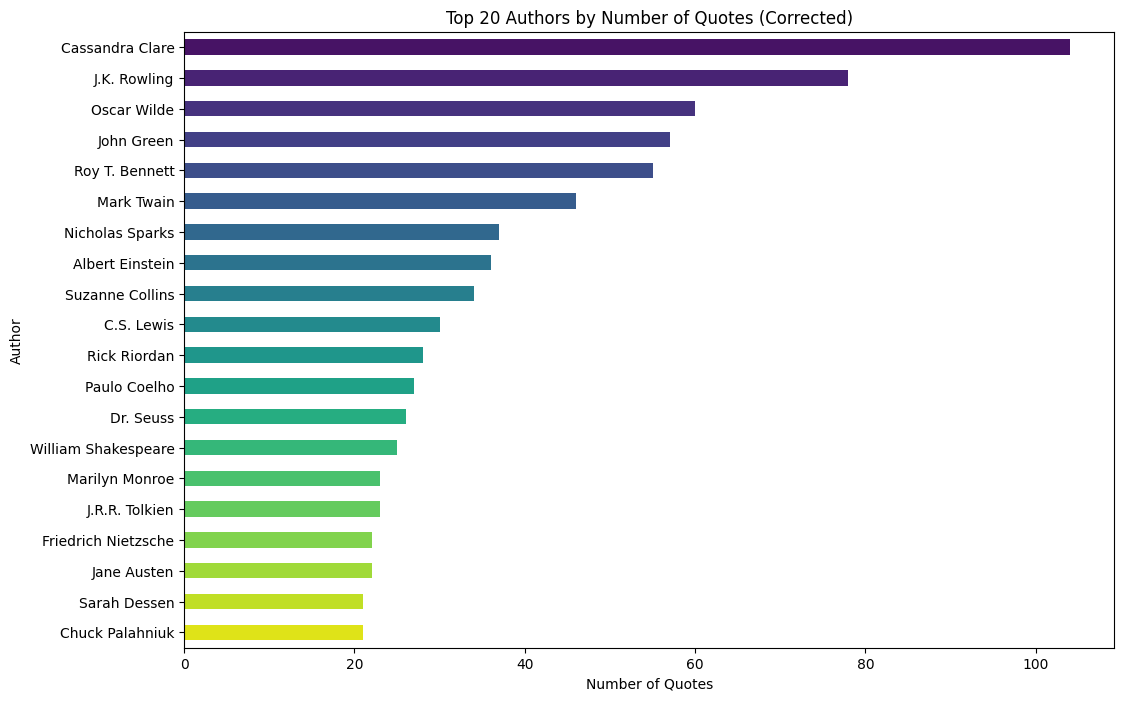

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Re-analyzing Author Distribution after cleaning...")
author_counts = df_cleaned['author'].value_counts()
print("\nTop 10 most frequent authors:")
print(author_counts.head(10))

# Plotting the top 20 authors
plt.figure(figsize=(12, 8))
author_counts.head(20).plot(kind='barh', color=sns.color_palette("viridis", 20))
plt.title('Top 20 Authors by Number of Quotes (Corrected)')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.show()

In [22]:
#analyzing tag distribution

In [23]:
print("Analyzing Tag Distribution")
tags_series = df_cleaned['tags'].explode()    #since the'tags' column contains lists of strings 
print(f"Total number of tags (including duplicates): {len(tags_series)}")
tag_counts = tags_series.value_counts()
print("\nTop 10 most frequent tags:")
print(tag_counts.head(10))

Analyzing Tag Distribution
Total number of tags (including duplicates): 8019

Top 10 most frequent tags:
tags
love                    327
inspirational           318
life                    295
humor                   254
books                   141
inspiration              87
reading                  86
happiness                68
writing                  67
inspirational-quotes     65
Name: count, dtype: int64


In [24]:
# since tag distribution found same tags have different variants, tags are normalizing using string manipulation and lemmatization

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# Get the full list of tag counts
all_tags = df.explode('tags')
tag_counts = all_tags['tags'].value_counts()
print(tag_counts.head(50))

tags
love                      327
inspirational             319
life                      295
humor                     254
books                     141
inspiration                87
reading                    86
happiness                  68
writing                    67
inspirational-quotes       65
friendship                 63
wisdom                     62
truth                      61
philosophy                 60
life-quotes                48
living                     48
optimism                   48
death                      47
hope                       46
poetry                     45
romance                    45
positive-affirmation       41
positive-thinking          41
life-lessons               40
women                      40
optimistic                 40
positive                   40
positive-life              40
inspire                    38
inspiring                  38
courage                    37
life-and-living            36
pain                       34
funny

In [27]:
#creating a tag cleaning function 

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def clean_tags(tag_list):
    if not isinstance(tag_list, list):
        return [] 

    cleaned_tags = set() # set used here to automatically handle with duplicates
    for tag in tag_list:
        tag = tag.lower()
        tag = tag.replace('-', ' ')
        lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokenize(tag)]  #lemmatizing words to the base form
        
        if tag.endswith('-quotes'): #since quotes is a common suffix 
            tag = tag.replace('-quotes', '')
        tag = tag.replace('-', '')
        tag = lemmatizer.lemmatize(tag, pos='n') 

        final_tags = set()
        for t in tag_list:
            
            clean_t = t.lower().replace('-', ' ')
            if clean_t.endswith('s'):
                 
                 clean_t = clean_t[:-1]
            
            if 'inspiration' in clean_t:
                clean_t = 'inspiration'
            if 'life lesson' in clean_t:
                clean_t = 'life-lessons'
            final_tags.add(clean_t.strip())

    return list(final_tags) 

In [28]:
def get_cleaned_tags(tag_list):
    if not isinstance(tag_list, list):
        return []

    tag_map = {
        'inspirational': 'inspiration', 'inspirational-quotes': 'inspiration',
        'inspirational-life': 'inspiration', 'inspirational-attitude': 'inspiration',
        'inspire': 'inspiration', 'inspiring': 'inspiration', 'motivational': 'inspiration',
        
        'life-quotes': 'life', 'life-lessons': 'life', 'life-and-living': 'life',
        'living': 'life',
        
        'reading': 'books',
        
        'funny': 'humor',

        'optimistic': 'optimism', 'positive-thinking': 'optimism',
        'positive-affirmation': 'optimism', 'positive-life': 'optimism', 'positive': 'optimism',
        
        'friends': 'friendship',
        
        'jace-wayland': 'jace wayland'
    }  #created from the result obtained in cell no.29
    
    cleaned_tags = set() # since set will automatically deals with duplicates
    for tag in tag_list:
        t = tag.lower()
        if t in tag_map:
            cleaned_tags.add(tag_map[t])
        else:
            t = t.replace('-', ' ')
            cleaned_tags.add(t)
    return list(cleaned_tags)

df['tags_cleaned'] = df['tags'].apply(get_cleaned_tags)
print("--- Checking the first 10 rows after applying the new function ---")
print(df[['tags', 'tags_cleaned']].head(10))

--- Checking the first 10 rows after applying the new function ---
                                                tags tags_cleaned
0  [be-yourself, gilbert-perreira, honesty, inspi...           []
1  [best, life, love, mistakes, out-of-control, t...           []
2  [human-nature, humor, infinity, philosophy, sc...           []
3                                     [books, humor]           []
4                              [books, simile, soul]           []
5  [ataraxy, be-yourself, confidence, fitting-in,...           []
6  [dance, heaven, hurt, inspirational, life, lov...           []
7                     [dreams, love, reality, sleep]           []
8                                      [humor, life]           []
9  [action, change, inspirational, philosophy, wish]           []


In [29]:
# Re-run this cell
all_tags_cleaned = df.explode('tags_cleaned')
cleaned_tag_counts = all_tags_cleaned['tags_cleaned'].value_counts()

print("\n--- Top 20 Most Frequent Tags AFTER Cleaning (Corrected) ---")
print(cleaned_tag_counts.head(20))


--- Top 20 Most Frequent Tags AFTER Cleaning (Corrected) ---
Series([], Name: count, dtype: int64)


In [30]:
# debugging and fixing data type

In [31]:
# Check the data type of the first item in the 'tags' column
first_item = df['tags'].iloc[0]
print(f"The data type of the item is: {type(first_item)}")
print(f"The item itself looks like this: {first_item}")

The data type of the item is: <class 'numpy.ndarray'>
The item itself looks like this: ['be-yourself' 'gilbert-perreira' 'honesty' 'inspirational'
 'misattributed-oscar-wilde' 'quote-investigator']


In [32]:
#converting the column from numpy array to list
import numpy as np
df['tags'] = df['tags'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

#again checking
fixed_first_item = df['tags'].iloc[0]
print(f"After fixing, the data type is now: {type(fixed_first_item)}")

After fixing, the data type is now: <class 'list'>


In [33]:
def get_cleaned_tags(tag_list):
    if not isinstance(tag_list, list):
        return []

    tag_map = {
        'inspirational-quotes': 'inspiration',
        'inspirational': 'inspiration',
        'life-lessons': 'life-lessons',
        'life-quotes': 'life',
        'reading': 'books'
    }
    
    cleaned_tags = set()
    
    for tag in tag_list:
        t = tag.lower()
        if t in tag_map:
            cleaned_tags.add(tag_map[t])
        else:
            t = t.replace('-', ' ')
            cleaned_tags.add(t)
            
    return list(cleaned_tags)

In [34]:

#applying the cleaning function to the new corrected data
df['tags_cleaned'] = df['tags'].apply(get_cleaned_tags)
all_tags_cleaned = df.explode('tags_cleaned')
cleaned_tag_counts = all_tags_cleaned['tags_cleaned'].value_counts()

print("DataFrame head with corrected tags_cleaned column ")
print(df[['tags', 'tags_cleaned']].head())

print("\n---Top 20 Most Frequent Tags AFTER Fixing and Cleaning ---")
print(cleaned_tag_counts.head(20))

DataFrame head with corrected tags_cleaned column 
                                                tags  \
0  [be-yourself, gilbert-perreira, honesty, inspi...   
1  [best, life, love, mistakes, out-of-control, t...   
2  [human-nature, humor, infinity, philosophy, sc...   
3                                     [books, humor]   
4                              [books, simile, soul]   

                                        tags_cleaned  
0  [be yourself, gilbert perreira, honesty, quote...  
1  [truth, worst, mistakes, best, life, out of co...  
2  [stupidity, philosophy, universe, science, inf...  
3                                     [humor, books]  
4                              [soul, simile, books]  

---Top 20 Most Frequent Tags AFTER Fixing and Cleaning ---
tags_cleaned
inspiration             360
love                    327
life                    295
humor                   254
books                   167
happiness                68
writing                  67
friendship   

In [35]:
# Visualizing Tag Distribution


--- Analyzing Cleaned Tag Distribution ---


C:\Users\HP\AppData\Local\Temp\ipykernel_44364\5497651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette="mako")


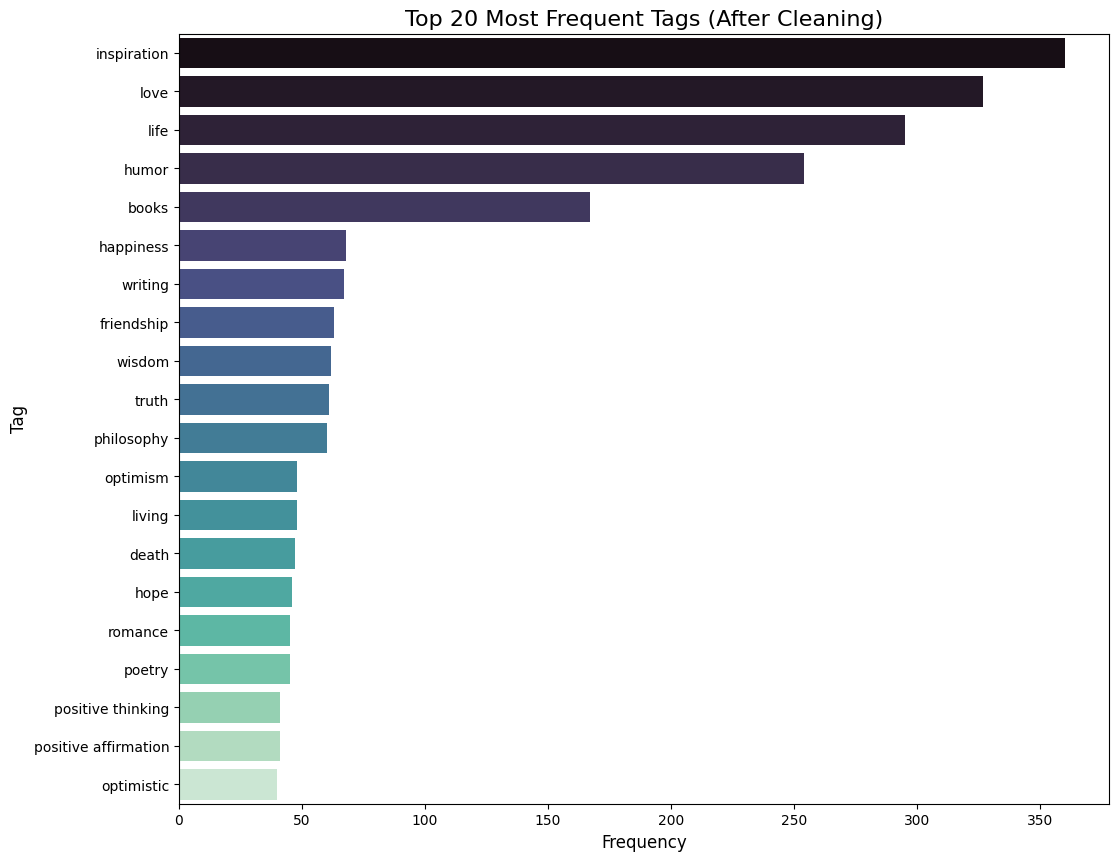

In [36]:
print("\n--- Analyzing Cleaned Tag Distribution ---")
tags_df = df.explode('tags_cleaned')
tag_counts = tags_df['tags_cleaned'].value_counts()
top_n = 20
top_tags = tag_counts.head(top_n)

# Create the plot
plt.figure(figsize=(12, 10)) 
sns.barplot(x=top_tags.values, y=top_tags.index, palette="mako")

plt.title(f'Top {top_n} Most Frequent Tags (After Cleaning)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Tag', fontsize=12)
plt.show()

In [37]:
# Phase 2- Model Fine tuning

In [38]:
# preparing document for embedding by combining the quote, the author, and the cleaned tags
def create_combined_text(row):
    tags_str = ', '.join(row['tags_cleaned'])
    return f"Quote: \"{row['quote']}\" Author: {row['author']}. Tags: {tags_str}"

df['combined_text'] = df.apply(create_combined_text, axis=1)

#an example
print("--- Example of a 'combined_text' entry ---")
print(df['combined_text'].iloc[0])


--- Example of a 'combined_text' entry ---
Quote: "“Be yourself; everyone else is already taken.”" Author: Oscar Wilde. Tags: be yourself, gilbert perreira, honesty, quote investigator, misattributed oscar wilde, inspiration


In [39]:
if 'combined_text' not in df.columns:
    def create_combined_text(row):
        tags_str = ', '.join(row['tags_cleaned'])
        return f"Quote: \"{row['quote']}\" Author: {row['author']}. Tags: {tags_str}"
    df['combined_text'] = df.apply(create_combined_text, axis=1)
df.to_csv('processed_quotes.csv', index=False)

print("DataFrame has been successfully saved to 'processed_quotes.csv'")

DataFrame has been successfully saved to 'processed_quotes.csv'


In [40]:
# creating training examples

In [41]:
# for constructive learning , using a specific loss function called MultipleNegativesRankingLoss from the sentence-transformers library

In [42]:
from sentence_transformers import InputExample

# Creating a list of training examples
train_examples = []
for index, row in df.iterrows():
    train_examples.append(InputExample(texts=[row['quote'], row['combined_text']]))

print(f"Created {len(train_examples)} training examples.")

Created 2508 training examples.


In [43]:
#configure and run fine tuning 

In [44]:
from sentence_transformers import SentenceTransformer, losses
from torch.utils.data import DataLoader

#model selected all-MiniLM-L6-v2
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)  #defining dataloader, this will handles batching of the data

train_loss = losses.MultipleNegativesRankingLoss(model=model)  #defining lose function

#specifying parameters
num_epochs = 1
warmup_steps = int(len(train_dataloader) * num_epochs * 0.1) 

#fine tuning the model
model.fit(train_objectives=[(train_dataloader, train_loss)],
          epochs=num_epochs,
          warmup_steps=warmup_steps,
          show_progress_bar=True)

fine_tuned_model_path = './fine_tuned_quote_model'
model.save(fine_tuned_model_path)

print(f"\nModel fine-tuning complete. The trained model is saved in: '{fine_tuned_model_path}'")

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

Step,Training Loss



Model fine-tuning complete. The trained model is saved in: './fine_tuned_quote_model'


In [45]:
# Phase3 - Building the RAG Pipeline Engine
# key assets—the cleaned data (df) and the fine-tuned model
# two process - indexing and retrieval

In [46]:
# loading fine tuned model and data

In [47]:
import pandas as pd
from sentence_transformers import SentenceTransformer

model_path = './fine_tuned_quote_model'
retriever_model = SentenceTransformer(model_path)
df = pd.read_csv('processed_quotes.csv')

import ast
df['tags_cleaned'] = df['tags_cleaned'].apply(ast.literal_eval)

print("Model and data loaded successfully.")

Model and data loaded successfully.


In [48]:
#create the embeddings for the entire dataset and building the FAISS index.

In [49]:
import faiss
import numpy as np

corpus = df['combined_text'].tolist()

print(f"Encoding {len(corpus)} documents with the fine-tuned model...")
corpus_embeddings = retriever_model.encode(corpus, convert_to_numpy=True, show_progress_bar=True)

#creating the FAISS index
embedding_dim = corpus_embeddings.shape[1]  
index = faiss.IndexFlatL2(embedding_dim)    

index.add(corpus_embeddings)

print(f"FAISS index created successfully.")
print(f"Number of documents in index: {index.ntotal}")
print(f"Dimension of vectors: {index.d}")

faiss.write_index(index, 'quotes.index')
print("\nFAISS index and processed data have been saved.")

Encoding 2508 documents with the fine-tuned model...


Batches:   0%|          | 0/79 [00:00<?, ?it/s]

FAISS index created successfully.
Number of documents in index: 2508
Dimension of vectors: 384

FAISS index and processed data have been saved.


In [50]:
#Phase4 - RAG Evaluation

In [51]:
# building the RAG "response" function

In [54]:
import os
import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np
from groq import Groq  


GROQ_API_KEY = "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"

if "YOUR_GROQ_API_KEY_HERE" in GROQ_API_KEY:
    raise ValueError("Please replace 'gsk_YOUR_GROQ_API_KEY_HERE' with your actual Groq API key.")


print("Loading local resources (retriever, index, data)...")
retriever_model = SentenceTransformer('./fine_tuned_quote_model')
index = faiss.read_index('quotes.index')
df = pd.read_csv('processed_quotes.csv').fillna('')
corpus = df['combined_text'].tolist()
print("Resources loaded successfully.")

#initializing the grok llm client
print("Initializing Groq client with Llama 3 model...")
try:
    client = Groq(
        api_key=GROQ_API_KEY,
    )
    print("Groq client initialized successfully.")
except Exception as e:
    print(f"Failed to initialize Groq client: {e}")
    exit()

#rag function
def get_rag_response(query: str, k: int = 5):
    
    query_embedding = retriever_model.encode([query])
    distances, indices = index.search(np.array(query_embedding), k)
    retrieved_contexts = [corpus[i] for i in indices[0]]
    context_str = "\n\n".join(retrieved_contexts)

    
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful quote assistant. You will be given context and a query. Your task is to provide a concise summary based *only* on the provided context and then list the most relevant quotes from that context to answer the query."
                },
                {
                    "role": "user",
                    "content": f"CONTEXT:\n{context_str}\n\nQUERY:\n{query}",
                }
            ],
            model="llama3-8b-8192",  
            temperature=0.7,
            max_tokens=300,
        )
        generated_answer = chat_completion.choices[0].message.content
        return generated_answer, retrieved_contexts

    except Exception as e:
        print(f"An error occurred during the Groq API call: {e}")
        
        return "Error: Could not get a response from the LLM.", []

#function testing
print("\n--- Running a test query with the Groq API ---")
test_query = "Motivational quotes tagged 'accomplishment'"


answer, contexts = get_rag_response(test_query)

print(f"\nQUERY: {test_query}")

if "Error:" in answer:
    print("\n==================== FAILED TO GET RESPONSE ====================")
    print(answer)
else:
    print("\n==================== GENERATED ANSWER (from Groq/Llama 3) ====================")
    print(answer)
    print("\n==================== RETRIEVED CONTEXTS ====================")
    if contexts:
        for i, context in enumerate(contexts, 1):
            print(f"Context {i}:\n{context}\n")
    else:
        print("No contexts were retrieved.")

Loading local resources (retriever, index, data)...
Resources loaded successfully.
Initializing Groq client with Llama 3 model...
Groq client initialized successfully.

--- Running a test query with the Groq API ---

QUERY: Motivational quotes tagged 'accomplishment'

==================== GENERATED ANSWER (from Groq/Llama 3) ====================
Based on the provided context, here is a concise summary:

The quotes in this context relate to the themes of individuality, desire, gratitude, success, and improvement. They emphasize the importance of being oneself, setting goals, and making a positive impact.

Here are the most relevant quotes tagged "accomplishment" to answer the query:

1. "To be yourself in a world that is constantly trying to make you something else is the greatest accomplishment." - Ralph Waldo Emerson
2. "Success is not how high you have climbed, but how you make a positive difference to the world." - Roy T. Bennett.

These quotes highlight the importance of being true

In [ ]:
# Running the RAGAS Evaluation

In [61]:
import os
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)
from ragas.llms.base import LangchainLLMWrapper
from langchain_groq import ChatGroq


from langchain_community.embeddings import HuggingFaceBgeEmbeddings


os.environ["GROQ_API_KEY"] = "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"
groq_llm = ChatGroq(model_name="llama3-8b-8192")
ragas_llm = LangchainLLMWrapper(groq_llm)


#configuring RAGAS embedding model
print("Initializing local embedding model for RAGAS...")

ragas_embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-small-en-v1.5")
print("Embedding model initialized.")

print("\nRunning RAGAS evaluation...")
result = evaluate(
    dataset=eval_dataset,
    metrics=[
        faithfulness,
        answer_relevancy,
        context_recall,
        context_precision,
    ],
    llm=ragas_llm,             
    embeddings=ragas_embeddings,
    raise_exceptions=False
)

print("Evaluation finished.")


print("\n--- RAGAS Evaluation Results ---")
print(result)

df_results = result.to_pandas()
print("\n--- Results as DataFrame ---")
print(df_results.head())

Initializing local embedding model for RAGAS...


C:\Users\HP\AppData\Local\Temp\ipykernel_44364\3473314747.py:28: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  ragas_embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-small-en-v1.5")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

D:\semantic_quote_retrievalsystem\rag_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--BAAI--bge-small-en-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding model initialized.

Running RAGAS evaluation...


Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Exception raised in Job[7]: TimeoutError()
Exception raised in Job[4]: TimeoutError()


Evaluation finished.

--- RAGAS Evaluation Results ---
{'faithfulness': 0.2000, 'answer_relevancy': 0.8655, 'context_recall': 0.3333, 'context_precision': 0.2500}

--- Results as DataFrame ---
                                     user_input  \
0  Quotes about insanity attributed to Einstein   
1   Motivational quotes tagged 'accomplishment'   
2             All Oscar Wilde quotes with humor   

                                  retrieved_contexts  \
0  [Quote: "“I became insane, with long intervals...   
1  [Quote: "“To be yourself in a world that is co...   
2  [Quote: "“If we couldn't laugh we would all go...   

                                            response  \
0  Based on the provided context, there are no qu...   
1  Summary:\nThe context provides five motivation...   
2  Based on the provided context, here is a summa...   

                                           reference  faithfulness  \
0  The definition of insanity is doing the same t...           0.0   
1  A motivat